In [28]:
import random,math
import numpy as np
import scipy
from pynverse import inversefunc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook

%matplotlib notebook

np.set_printoptions(suppress=True)

In [4]:
def conditional_dist(x, y): 
    p = y * exp(-y * x)
    return p

In [3]:
def cdf(x, y, B): 
    integeral_val = scipy.integrate.quad(conditional_dist, 0, B)
    const = 1/integeral_val
    cdf = const * conditional_dist
    return cdf

In [33]:
def inverse_transform(B, y):
    cdf = np.random.uniform(0, 1)
    x = - math.log(1 - cdf * (1 - math.exp(-B * y)))/y
    return x

In [34]:

def gibbs(start_val, B, T):
    samples = np.zeros((T, 2))
    y = start_val
    for i in range(T):
        x = inverse_transform(B, y)
        y = inverse_transform(B, x)
        samples[i, 0] = x
        samples[i, 1] = y
        
    return samples
 


In [35]:
sample_1 = gibbs(1, 5, 500)
sample_2 = gibbs(1, 5, 5000)
sample_3 = gibbs(1, 5, 50000)

<IPython.core.display.Javascript object>


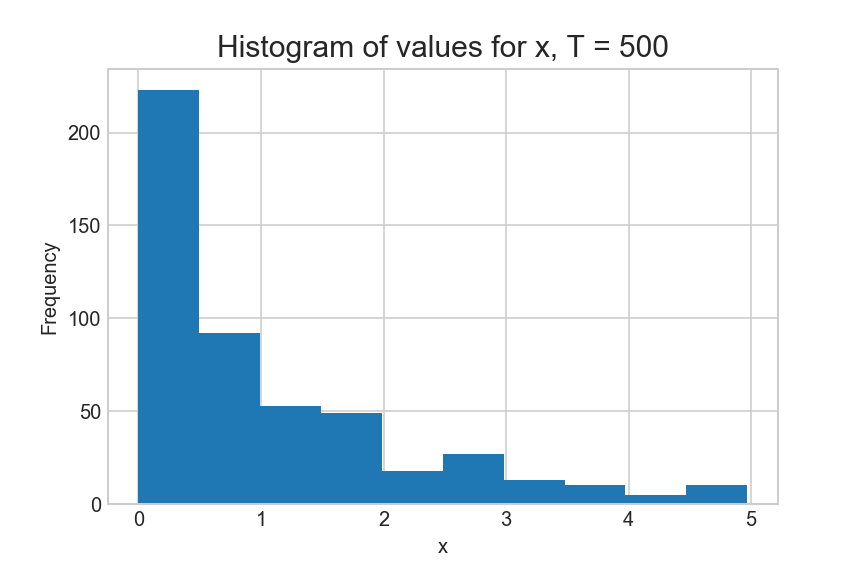

Text(0,0.5,'Frequency')

In [37]:
plt.hist(sample_1[: , 0])
plt.title('Histogram of values for x, T = 500', fontsize = 15)
plt.xlabel('x')
plt.ylabel("Frequency")

<IPython.core.display.Javascript object>


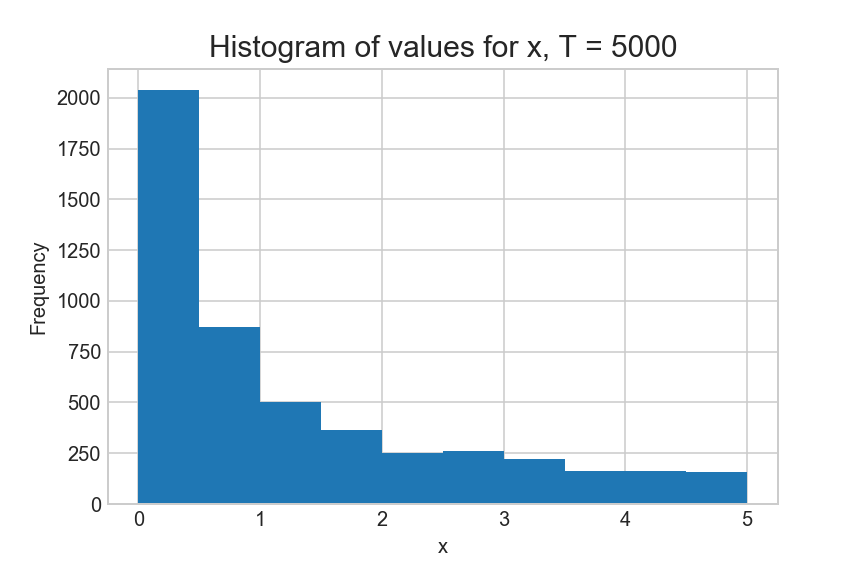

Text(0,0.5,'Frequency')

In [38]:
plt.hist(sample_2[: , 0])
plt.title('Histogram of values for x, T = 5000', fontsize = 15)
plt.xlabel('x')
plt.ylabel("Frequency")

<IPython.core.display.Javascript object>


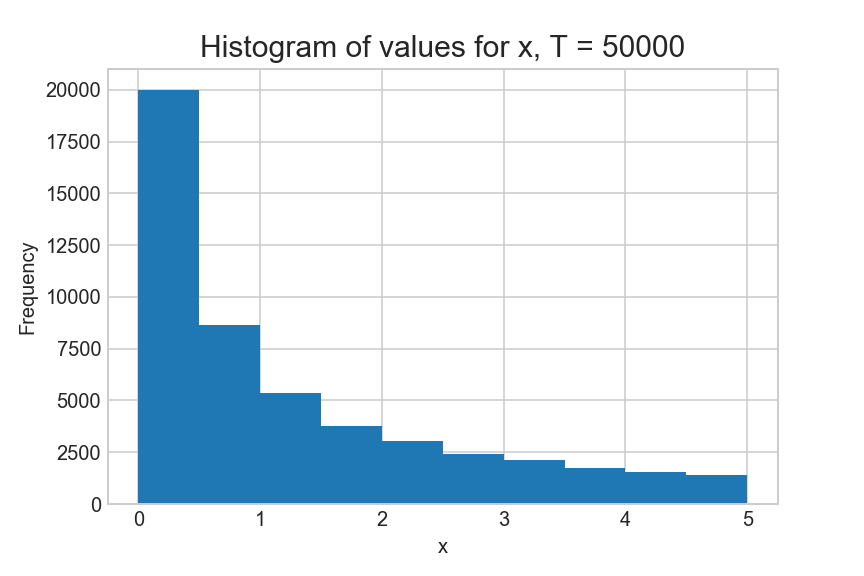

Text(0,0.5,'Frequency')

In [39]:
plt.hist(sample_3[: , 0])
plt.title('Histogram of values for x, T = 50000', fontsize = 15)
plt.xlabel('x')
plt.ylabel("Frequency")

In [40]:
E_x1 = np.mean(sample_1[:, 0])
E_x2 = np.mean(sample_2[:, 0])
E_x3 = np.mean(sample_3[:, 0])

In [41]:
print(E_x1, E_x2, E_x3)

1.0433104105889184 1.2738522124835785 1.2694786407340006
